In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
# 1. a) Din ora in ora => fs = 1/60*60
fs = 1/3600

In [4]:
# b) N = 18288 esantioane cu fs 1/3600
N = 18288
interval = (0, N/fs)
print(interval)

(0, 65836800.0)


In [5]:
# c) frecventa maxima = fs/2
print('Frecventa maxima =', fs/2)

Frecventa maxima = 0.0001388888888888889


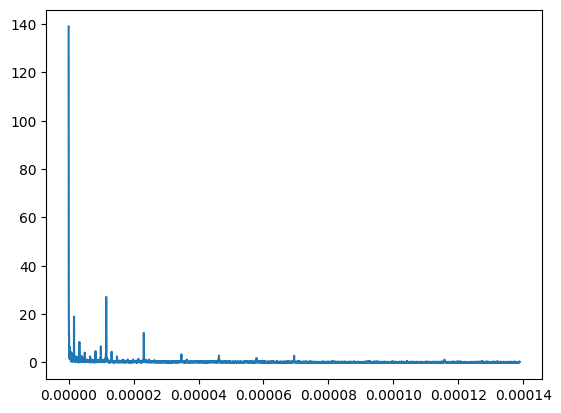

In [6]:
# d)
train_data = np.genfromtxt('Train.csv', delimiter=',')
X = np.fft.fft(train_data[1:, -1])
X = abs(X/N)
X = X[:N//2]
f = fs*np.linspace(0, N//2, N//2)/N

plt.plot(f, X)

[-130.95811461 -136.95811461 -132.95811461 ...  563.04188539  441.04188539
  395.04188539]


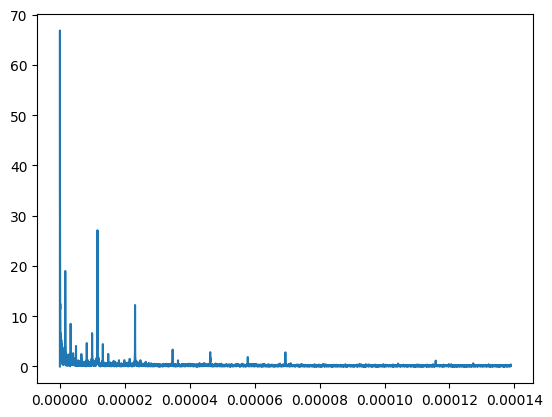

In [7]:
# e) Nu, frecventa 0 are amplitudine 138.95811461067368
semnal = train_data[1:, -1] - X[0]
print(semnal)

X = np.fft.fft(semnal)
X = abs(X/N)
X = X[:N//2]
f = fs*np.linspace(0, N//2, N//2)/N

plt.plot(f, X)

In [8]:
# f) Componentele principale
l = list(zip(list(X), list(f)))
l.sort()
l = list(reversed(l))
print(l)
print(list(map(lambda x: x[1], l[:4])))

[(66.85385766393449, 1.5190734866989925e-08), (35.2191729779369, 3.038146973397985e-08), (27.102022287615565, 1.1575339968646325e-05), (25.21991648404482, 4.557220460096978e-08), (19.00047159094226, 1.6557901005019021e-06), (17.72238704408944, 6.07629394679597e-08), (13.953974637241835, 1.1590530703513315e-05), (13.745514425997786, 7.595367433494964e-08), (12.469178747996837, 1.0633514406892949e-07), (12.227421791046734, 2.315067993729265e-05), (11.60099554948204, 1.215258789359194e-07), (11.589404631839127, 1.1560149233779334e-05), (11.415220027372067, 9.114440920193956e-08), (9.992607032480972, 1.640599365634912e-06), (8.816849642146728, 1.3671661380290935e-07), (8.489837096841457, 3.3115802010038043e-06), (7.911400593728717, 1.5190734866989928e-07), (7.79909481495235, 1.670980835368892e-07), (7.716924867799988, 1.1605721438380305e-05), (7.700708196305434, 1.670980835368892e-06), (6.649380455063513, 2.1267028813785898e-07), (6.641152803459677, 9.919549868144423e-06), (6.6045051226327

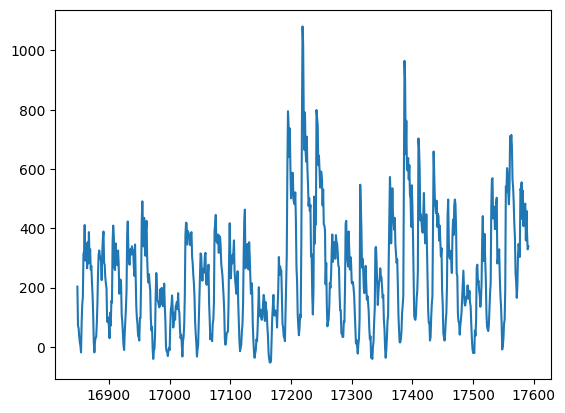

In [13]:
# sambata si duminica traficul este redus.
# Dupa ce am luat o sectiune la intamplare, am mutat-o cu
# 48 de ore, deoarece incepea intr-o sambata.
esantion_start = 24*7*100 + 48
esantioane_pe_luna = 24*31
plt.plot(np.arange(esantion_start, esantion_start+esantioane_pe_luna),
         semnal[esantion_start:esantion_start+esantioane_pe_luna])

24.580645161290324


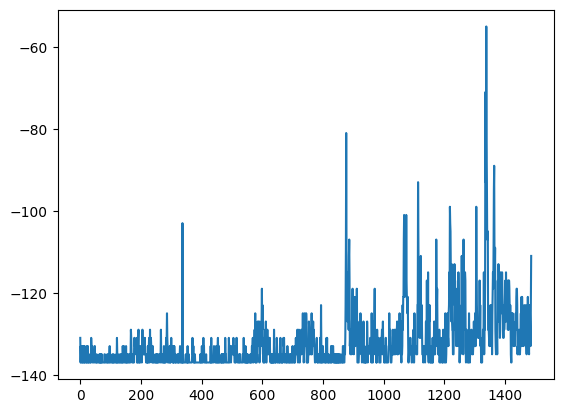

In [19]:
print(N/24/31)
plt.plot(np.arange(0, 24*62), semnal[0:24*62])

# h)
# Observatii:
# 1. Vinerea traficul creste, probabil deoarece lumea merge in vacanta
# 2. La inceput este o perioada cu putin trafic iar la final este o perioada cu trafic intens
# 3. Datele au fost preluate pe timp de doi an
# Intervalul provine din 2020-2022, inceputul pandemiei si la final relaxarea restrictiilor.

In [22]:
# i)
print(N*len(f))

167225472
